# Домашнее задание 4

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv', encoding = '1251', sep=',', index_col='id', parse_dates=['date'], dayfirst=False)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

## Задание 1


### 1.2 Изучите стоимости недвижимости

In [5]:
df['price'].min(), df['price'].max()

(75000.0, 7700000.0)

In [6]:
df.sort_values(by='price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [7]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

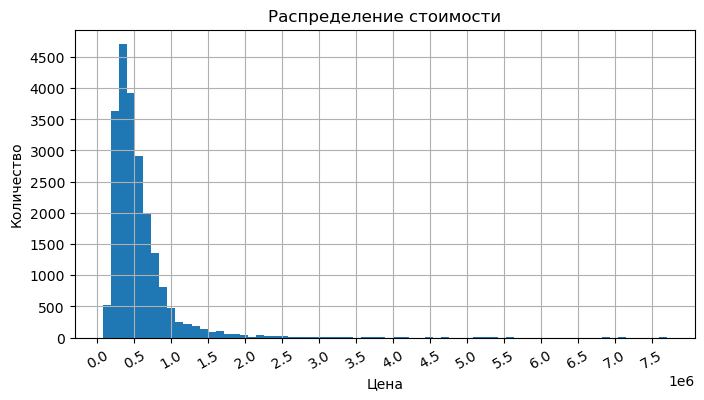

In [30]:
plt.figure(figsize=(8, 4))

plt.hist(df['price'], bins=70)

plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.xticks(range(0, 8000000, 500000), rotation=30)
plt.yticks(range(0, 5000, 500))
plt.grid();

Диапазон стоимости домов варьируется от 75 000 до 7 700 000. Согласно построенному графику можно сделать вывод о том, что в этой базе данных имеются значительные выбросы по стоимости домов. Но можно сделать вывод о том, что большую долю составляют дома по стоимости в диапазон от 350 000 до 450 000.

### 1.3 Изучите распределение квадратуры жилой площади

In [38]:
df['sqft_living'].min(), df['sqft_living'].max()

(290, 13540)

In [27]:
data_sqft_living = df['sqft_living'].value_counts()
data_sqft_living

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

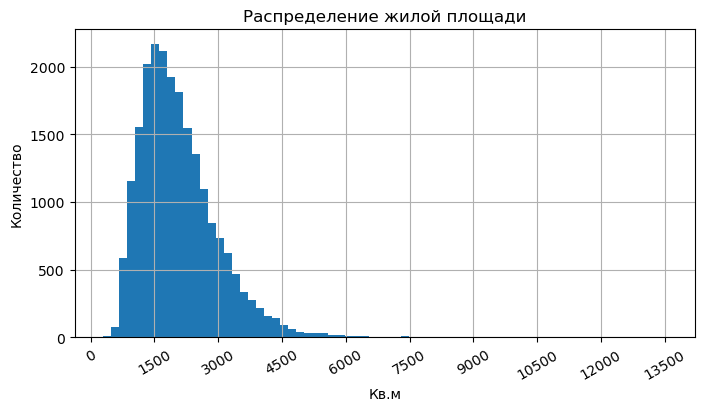

In [37]:
plt.figure(figsize=(8, 4))

plt.hist(df['sqft_living'], bins=70)

plt.title('Распределение жилой площади')
plt.xlabel('Кв.м')
plt.ylabel('Количество')
plt.xticks(range(0, 14000, 1500), rotation=30)
plt.yticks(range(0, 2500, 500))
plt.grid();

По количеству квадратных метров предложение по домам находится в диапазоне от 290 кв.м до 13 540кв.м. Соответсвенно по графику также наблюдаются большие выбросы, но важно отметить, что большая часть домов продается с площадью 1500 кв.м.

### 1.4 Изучите распределение года постройки


In [9]:
data_built = df['yr_built'].value_counts()
data_built

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

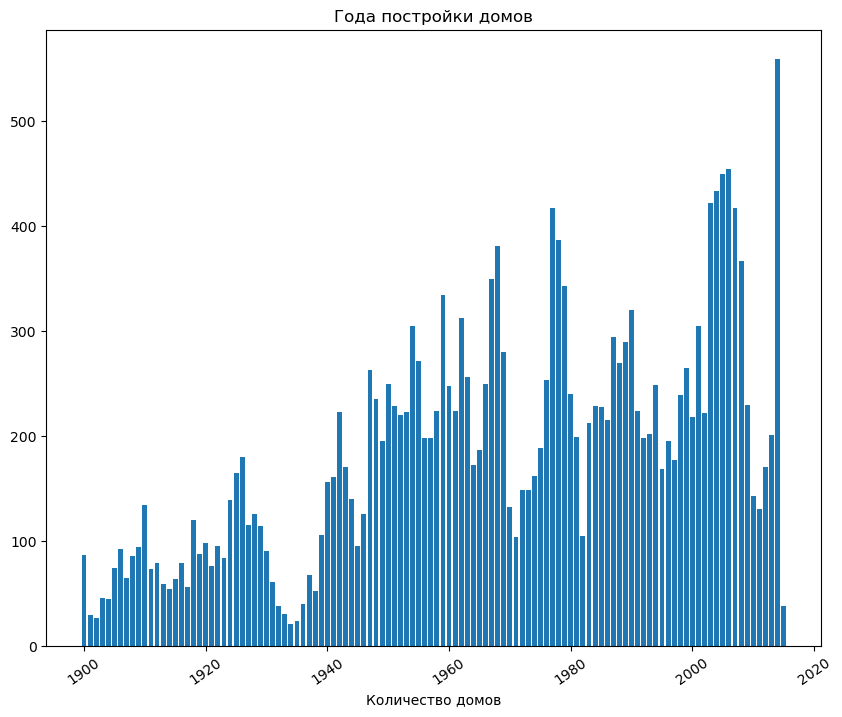

In [10]:
plt.figure(figsize=(10, 8))
plt.title('Года постройки домов')
plt.xlabel('Количество домов')
plt.bar(data_built.index, data_built.values)
plt.xticks(rotation=35);

Согласно графику распределения годов постройки домов можно сделать вывод, что наибольшее количество домов было построено в 2014 году. Но также стоит отметить, что в определенные периоды по несколько лет подряд было построено большое количество домов. Например, в период с 2003 по 2006 год. Что может быть обусловлено политическими и экономическими событиями в стране.

## Задание 2

### 2.1 Изучите распределение домов от наличия вида на набережную

In [11]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Распределение домов с видом на набережную')

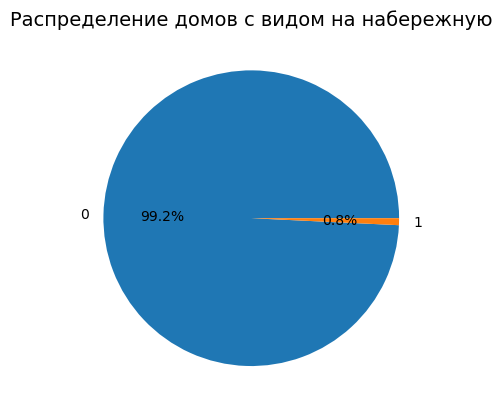

In [12]:
plt.pie(data.values, labels=data.index, autopct='%.1f%%')
plt.title(label='Распределение домов с видом на набережную', fontsize=14)

Как показывает график, меньше 1% домов имеют вид на набережную.

### 2.2 Изучите распределение этажей домов


In [13]:
data_floors = df['floors'].value_counts()
data_floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Text(0.5, 1.0, 'Распределение этажей домов')

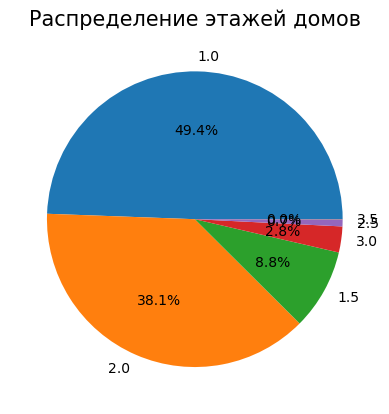

In [14]:
plt.pie(data_floors.values, labels=data_floors.index, autopct='%.1f%%')
plt.title(label='Распределение этажей домов', fontsize=15)


Согласно графику:
- половина из всех домов относится к категории 1 по этажности;
- 38% домов относится к категории 2 по этажности;
- менее 10% домов имеют категорию 1,5;
- менее 4% домов относятся к категории 2-3 по этажности.

### 2.3 Изучите распределение состояния домов

In [15]:
data_condition = df['condition'].value_counts()
data_condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Text(0.5, 1.0, 'Состояние домов')

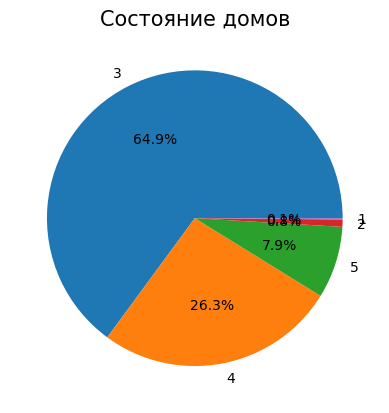

In [16]:
plt.pie(data_condition.values, labels=data_condition.index, autopct='%.1f%%')
plt.title(label='Состояние домов', fontsize=15)

Можно сделать вывод:
- 65% домов находятся в среднем состоянии ("Оценка 3"):
- 26% домов - в хорошем состоянии;
- 8% домов - в отличном состоянии; 
- менее 1% домов находятся в плохом состоянии.

## Задание 3
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.


#### 1. Зависимость стоимости недвижимости от внешних условий дома.

Text(0.5, 1.0, 'Зависимость стоимости недвижимости от внешних условий дома')

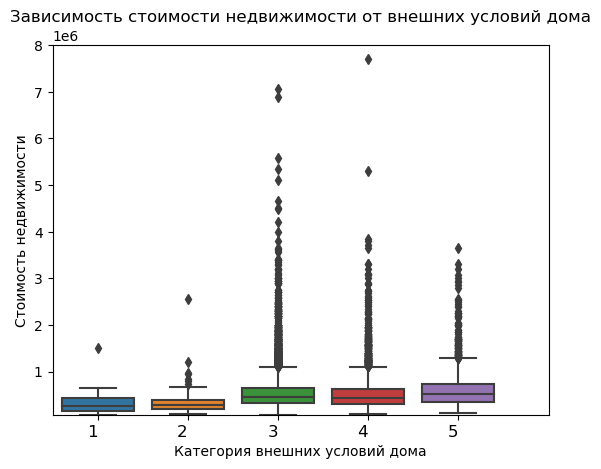

In [62]:
sns.boxplot(x='condition', y='price', data=df)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.xlim(None,5)
plt.axis(ymin=75000, ymax=8000000)
plt.xlabel('Категория внешних условий дома')
plt.ylabel('Стоимость недвижимости')
plt.title('Зависимость стоимости недвижимости от внешних условий дома')

Меньшая степень зависимости стоимости недвижимости о состояния дома наблюдается у домов в категории 2 (плохое состояние), по остальным же категориям примерно одинаковая зависимости и в больше степени у домов в "отличном" состоянии (категория 5).
Но как уже было указано выше, в выборке данных имеются большие выбросы. Поэтому для более детального анализа необходимо для начала почистить данные от выбросов.

#### 2. Зависимость стоимости недвижимости от вида на набережную

Text(0.5, 1.0, 'Зависимость стоимости недвижимости от вида на набережную')

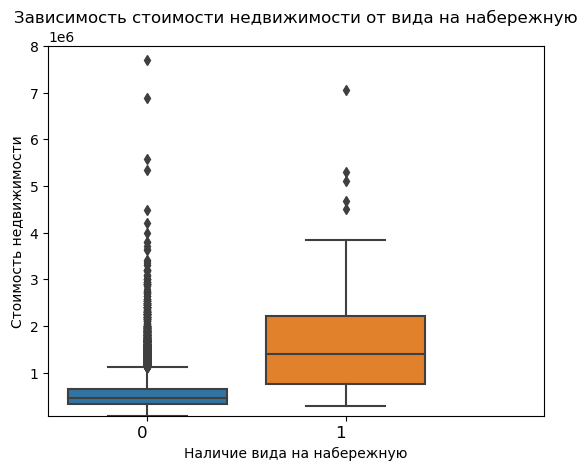

In [54]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.xlim(None,2)
plt.axis(ymin=75000, ymax=8000000)
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Стоимость недвижимости')
plt.title('Зависимость стоимости недвижимости от вида на набережную')

Согласно графику видно, что наличие вида на набережную имеет сильное влияние на стоимость недвижимости.

#### 3. Зависимость стоимости недвижимости от состояния здания


Text(0.5, 1.0, 'Зависимость стоимости недвижимости от состояния здания')

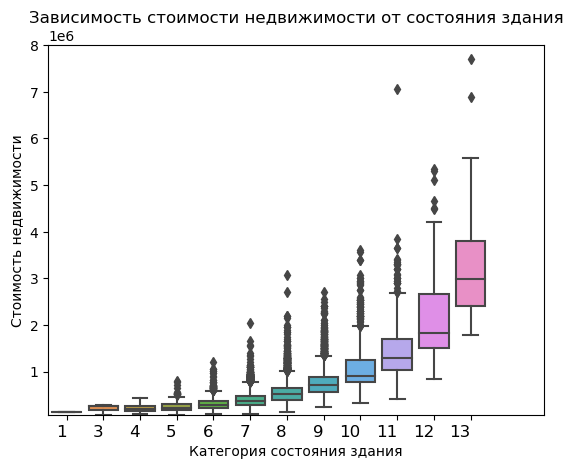

In [60]:
sns.boxplot(x='grade', y='price', data=df)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.xlim(None,13)
plt.axis(ymin=75000, ymax=8000000)
plt.xlabel('Категория состояния здания')
plt.ylabel('Стоимость недвижимости')
plt.title('Зависимость стоимости недвижимости от состояния здания')

Пояснение категорий:
- 1-3 плохая конструкция здания и дизайн;
- 7 - средний уровень конструкции и дизайна;
- 11-13 - высокое качество конструкции и дизайна

Построенный график показывает, что наибольшая взаимосвязь стоимости недвижимости и состояния здания у домов с высоким качеством конструкций и дизайна (категория 11-13).

#### 4. Зависимость стоимости недвижимости от вида из окна


Text(0.5, 1.0, 'Зависимость стоимости недвижимости от вида из окна')

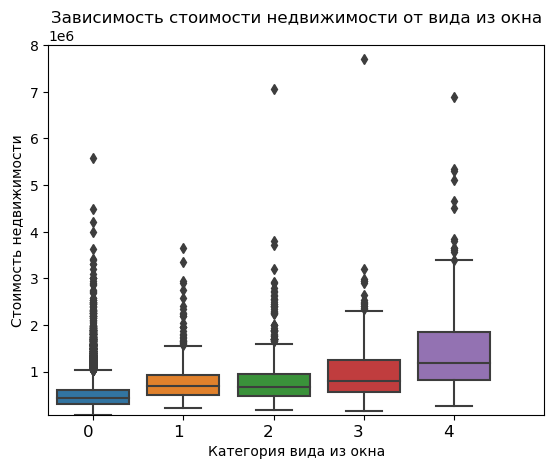

In [57]:
sns.boxplot(x='view', y='price', data=df)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.xlim(None,5)
plt.axis(ymin=75000, ymax=8000000)
plt.xlabel('Категория вида из окна')
plt.ylabel('Стоимость недвижимости')
plt.title('Зависимость стоимости недвижимости от вида из окна')

Наибольшая зависимость стоимости недвижимости у домов, у которых вид из окна имеет высшую категорию (4).

#### 5. Зависимость стоимости недвижимости от категории этажности дома


Text(0.5, 1.0, 'Зависимость стоимости недвижимости от категории этажности дома')

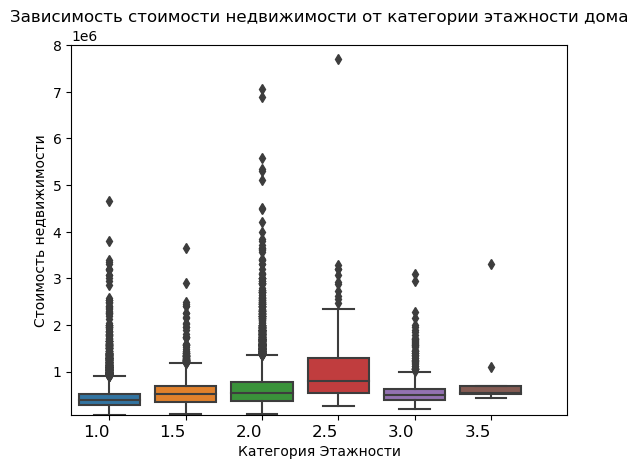

In [68]:
sns.boxplot(x='floors', y='price', data=df)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.xlim(None,6)
plt.axis(ymin=75000, ymax=8000000)
plt.xlabel('Категория Этажности')
plt.ylabel('Стоимость недвижимости')
plt.title('Зависимость стоимости недвижимости от категории этажности дома')

Наибольшая зависимость стоимости недвижимости у домов с категорией этажности 2,5.

### Итоговые выводы:
В имеющейся выборке данных предоставлены данные о продаже домов. Проведенный анализ данных позволил сделать следующие выводы:
- Наибольшее количество проданных домов имеют стоимость в диапазоне от 350 000 до 450 000.
- По жилой площади наибольшее количество домов имею квадратуру 1500 кв.м.
- Наибольшее количество домов построено после 2003 года.
- Менее 1% домов имеют вид на набережную.
- Почти половина домов относится к категории 1 по этажности.
- 65% домов находятся в среднем состоянии ("Оценка 3")

А также был проведен анализ зависимости стоимости недвижимости от таких факторов как: 
- Вид из окна;
- Категория этажности;
- Внешнее состояние здания;
- Наличие вида на набережную;
- Состояние здания.